In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

In [3]:
from torch_geometric.data import Data, DataLoader
from torch_geometric.datasets import TUDataset, Planetoid
from torch_geometric.nn import GCNConv, Set2Set, GNNExplainer
import torch_geometric.transforms as T
import torch
import torch.nn.functional as F
import os

import matplotlib.pyplot as plt
from dgl.data import BACommunityDataset
import networkx as nx
import torch_geometric


In [47]:
from src.model import *
from src.data import *
from src.explainer import *
from src.plot import *
from src.modify import *
from src.protgnn import *

In [5]:
train_dataset,data = get_cora_dataset()

In [6]:
epochs = 200
dim = 16

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(num_features=train_dataset.num_features, dim=dim, num_classes=train_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-3)


In [8]:
model = train_model(epochs,model,device,data,optimizer,test_model)

[Train_loss:1.565478 Train_acc: 0.4245, Test_acc: 0.4400]: 100%|█| 200/


In [9]:
explainer = GNNExplainer(model, epochs=200)

In [10]:
node_feature_mask, edge_mask = explain_model(explainer,data,10)

Explain node 10: 100%|██████████████| 200/200 [00:00<00:00, 666.82it/s]


In [11]:
gce_explainer = GCExplainer()

In [12]:
gce_explainer.learn_prototypes(model,data)

/rds/user/njr61/hpc-work/anaconda3/envs/gnn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
gce_explainer.get_prediction(model,data)

array([3, 1, 1, ..., 0, 3, 3])

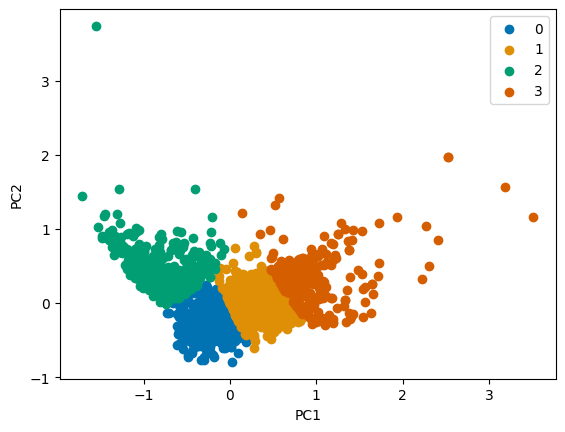

In [14]:
plot_kmeans_clusters(gce_explainer.kmeans,gce_explainer.initial_activations)

In [15]:
gce_explainer.get_prediction(model,identity(data))

array([3, 1, 1, ..., 0, 3, 3])

In [22]:
model = GCNNet_NC(train_dataset.num_features, train_dataset.num_classes, model_args)

In [27]:
model = train_model(epochs,model,device,data,optimizer,test_model,protgnn=True)

[Train_loss:0.236223 Train_acc: 0.1622, Test_acc: 0.2280]: 100%|█| 200/


In [48]:
prot_explainer = ProtGNNExplainer()

In [50]:
prot_explainer.learn_prototypes(model,data)

In [51]:
prot_explainer.get_prediction(model,data)

array([21, 21, 21, ..., 21, 21, 21])